In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Load dataset
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\amazon_returns_optimized.csv")

In [7]:
df.head()

,order_id,customer_id,product_category,price,discount,shipping_type,delivery_time,expected_delivery,review_rating,return_status,customer_tenure,num_previous_returns,used_coupon
0,1,CUST_655,Toys,644.00,NaN,Standard,9,12,5.0,0,17,2,1
1,2,CUST_115,Clothing,1932.98,15.40,Standard,8,4,2.0,0,14,6,1
2,3,CUST_26,Books,554.62,188.58,Express,14,1,1.0,1,40,5,1
3,4,CUST_760,Electronics,1739.04,179.22,Express,2,14,5.0,0,56,6,0
4,5,CUST_282,Toys,657.84,7.38,Express,10,12,2.0,0,60,3,1


In [9]:
df.shape

(50000, 13)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              50000 non-null  int64  
 1   customer_id           50000 non-null  object 
 2   product_category      50000 non-null  object 
 3   price                 47527 non-null  float64
 4   discount              47527 non-null  float64
 5   shipping_type         50000 non-null  object 
 6   delivery_time         50000 non-null  int64  
 7   expected_delivery     50000 non-null  int64  
 8   review_rating         47468 non-null  float64
 9   return_status         50000 non-null  int64  
 10  customer_tenure       50000 non-null  int64  
 11  num_previous_returns  50000 non-null  int64  
 12  used_coupon           50000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 5.0+ MB


In [13]:
df.describe()

,order_id,price,discount,delivery_time,expected_delivery,review_rating,return_status,customer_tenure,num_previous_returns,used_coupon
count,50000.000000,47527.000000,47527.000000,50000.000000,50000.000000,47468.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,963.334317,95.912459,8.701860,7.184820,3.001454,0.200000,30.511580,3.316400,0.498560
std,14433.901067,575.525619,58.911742,4.241058,4.273475,1.354894,0.400004,17.306556,1.953716,0.500003
min,1.000000,60.770000,1.390000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,12500.750000,410.470000,49.860000,5.000000,4.000000,2.000000,0.000000,16.000000,2.000000,0.000000
50%,25000.500000,939.340000,85.420000,9.000000,7.000000,3.000000,0.000000,31.000000,3.000000,0.000000
75%,37500.250000,1472.730000,160.730000,12.000000,11.000000,4.000000,0.000000,45.000000,5.000000,1.000000
max,50000.000000,1974.430000,194.360000,15.000000,15.000000,5.000000,1.000000,60.000000,6.000000,1.000000


In [15]:
# Check missing values
print("\n🔎 Missing Values (per column):")
print(df.isnull().sum())


🔎 Missing Values (per column):
order_id                   0
customer_id                0
product_category           0
price                   2473
discount                2473
shipping_type              0
delivery_time              0
expected_delivery          0
review_rating           2532
return_status              0
customer_tenure            0
num_previous_returns       0
used_coupon                0
dtype: int64


In [17]:
# Percentage of missing values
print("\n📉 Missing Values (%):")
print((df.isnull().sum() / len(df)) * 100)


📉 Missing Values (%):
order_id                0.000
customer_id             0.000
product_category        0.000
price                   4.946
discount                4.946
shipping_type           0.000
delivery_time           0.000
expected_delivery       0.000
review_rating           5.064
return_status           0.000
customer_tenure         0.000
num_previous_returns    0.000
used_coupon             0.000
dtype: float64


In [19]:
# Check duplicates
duplicate_count = df.duplicated().sum()
print(f"\n📦 Duplicate rows: {duplicate_count}")


📦 Duplicate rows: 0


In [21]:
# Clean Missing & Duplicate Data
df.drop_duplicates(inplace=True)
df['price'].fillna(df['price'].median(),inplace=True)
df['discount'].fillna(df['discount'].median(),inplace=True)
df['review_rating'].fillna(df['review_rating'].mode()[0],inplace=True)

In [23]:
print("\n📉 Missing Values (%):")
print((df.isnull().sum() / len(df)) * 100)


📉 Missing Values (%):
order_id                0.0
customer_id             0.0
product_category        0.0
price                   0.0
discount                0.0
shipping_type           0.0
delivery_time           0.0
expected_delivery       0.0
review_rating           0.0
return_status           0.0
customer_tenure         0.0
num_previous_returns    0.0
used_coupon             0.0
dtype: float64


In [25]:
# Drop non-predictive columns
df = df.drop(['order_id', 'customer_id'], axis=1)

In [27]:
df.head()

,product_category,price,discount,shipping_type,delivery_time,expected_delivery,review_rating,return_status,customer_tenure,num_previous_returns,used_coupon
0,Toys,644.00,85.42,Standard,9,12,5.0,0,17,2,1
1,Clothing,1932.98,15.40,Standard,8,4,2.0,0,14,6,1
2,Books,554.62,188.58,Express,14,1,1.0,1,40,5,1
3,Electronics,1739.04,179.22,Express,2,14,5.0,0,56,6,0
4,Toys,657.84,7.38,Express,10,12,2.0,0,60,3,1


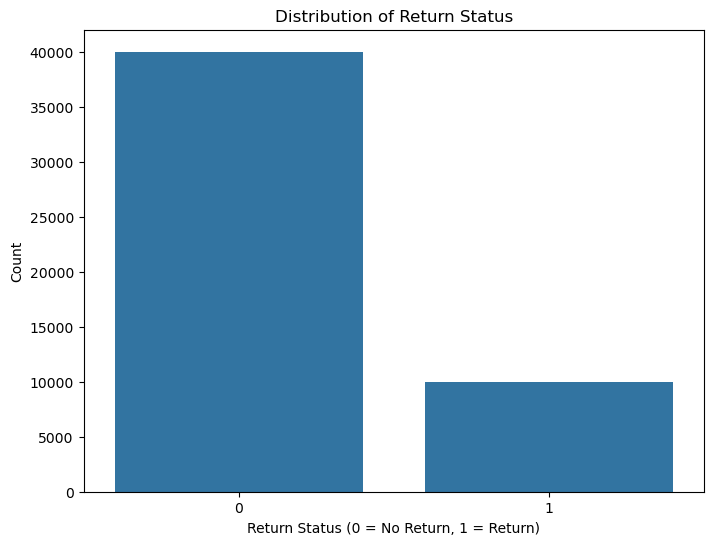

In [29]:
# --- EDA ---
# 1. Target Variable Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='return_status', data=df)
plt.title('Distribution of Return Status')
plt.xlabel('Return Status (0 = No Return, 1 = Return)')
plt.ylabel('Count')
plt.show()

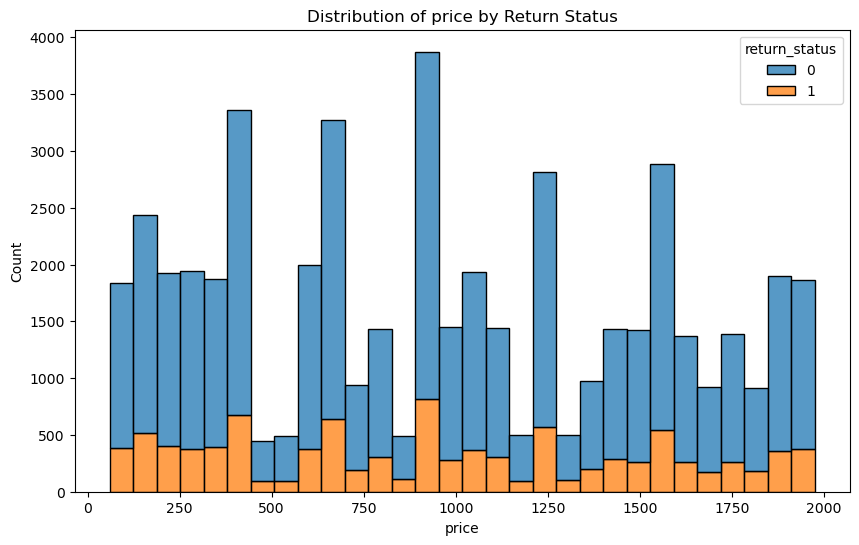

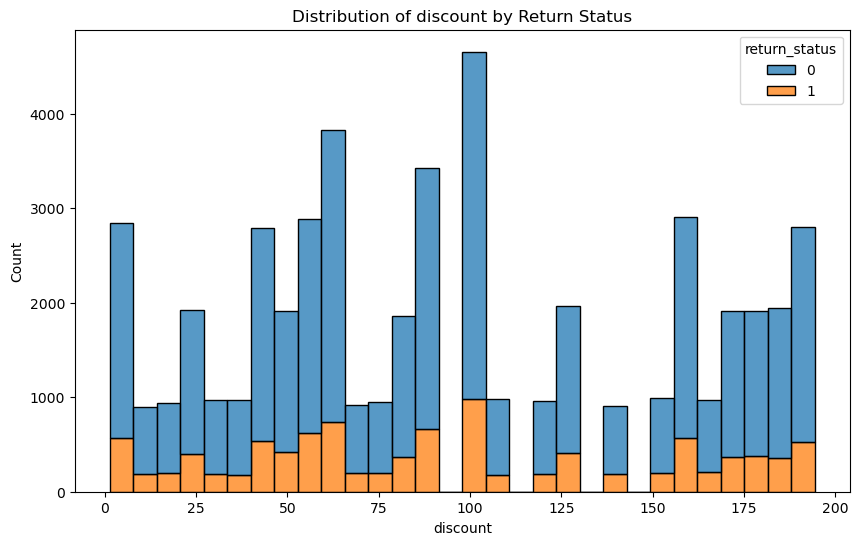

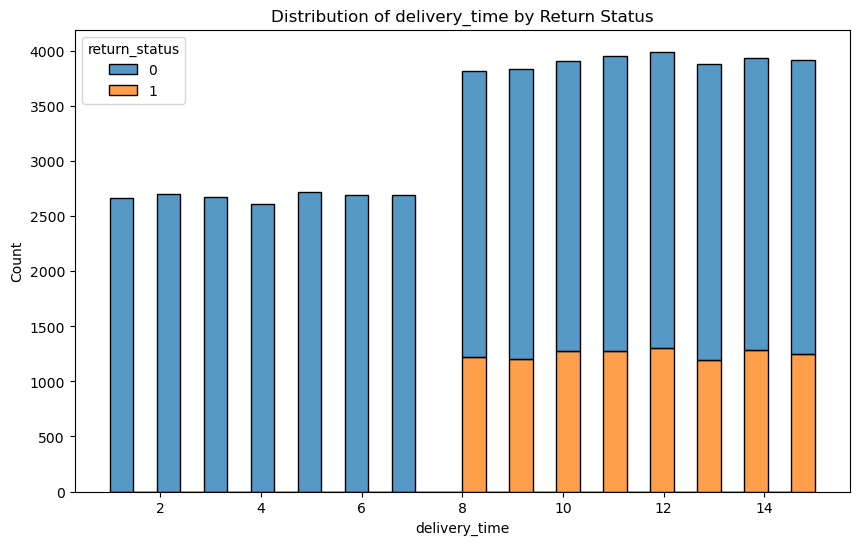

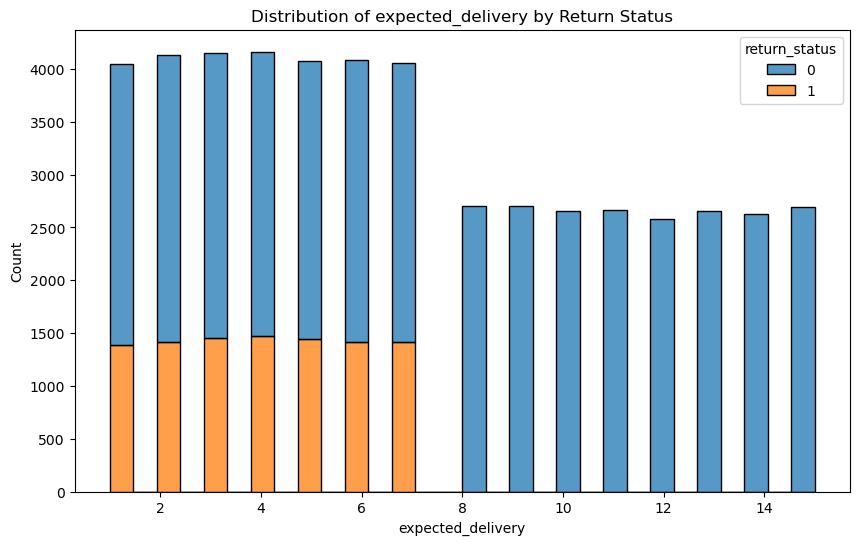

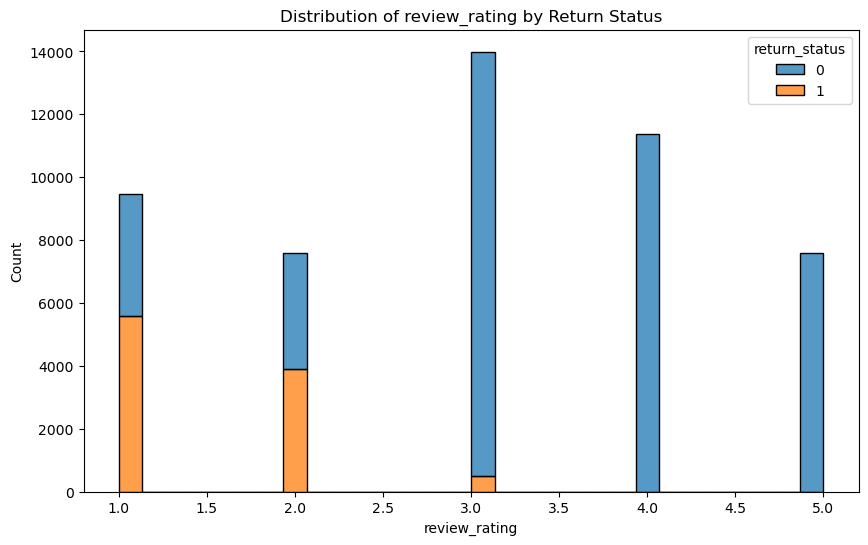

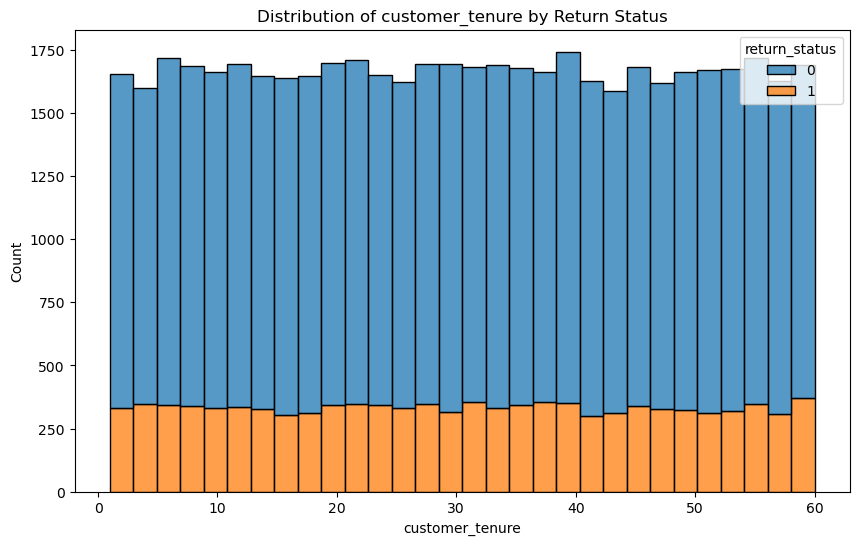

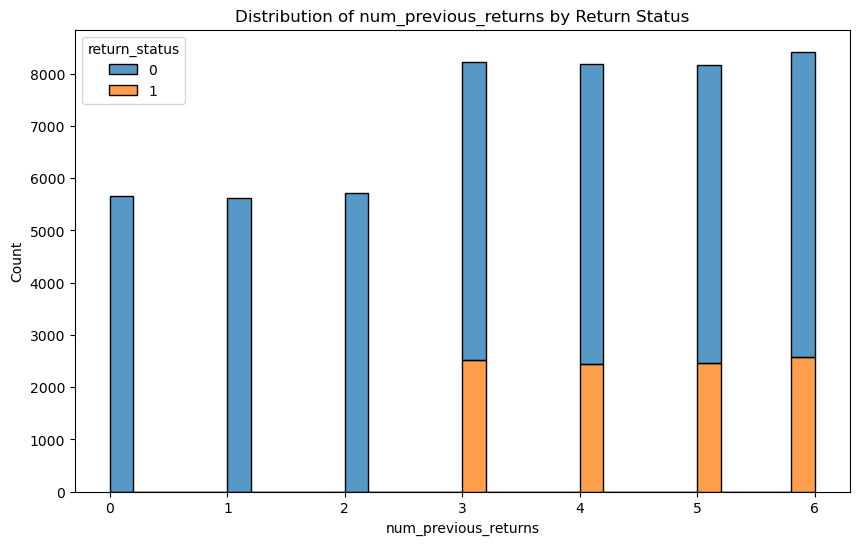

In [35]:
# 2. Numerical Columns
numerical_cols = ['price', 'discount', 'delivery_time', 'expected_delivery', 
                  'review_rating', 'customer_tenure', 'num_previous_returns']
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, hue='return_status', multiple='stack', bins=30)
    plt.title(f'Distribution of {col} by Return Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
     
    

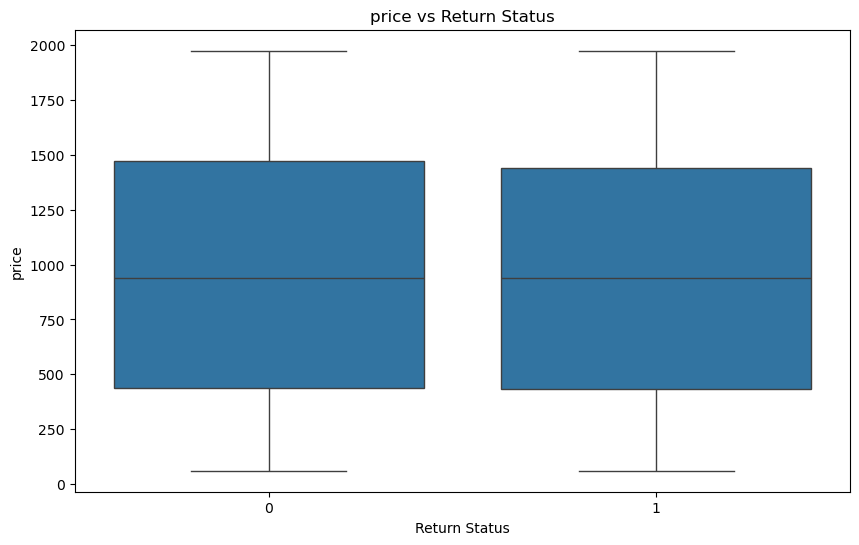

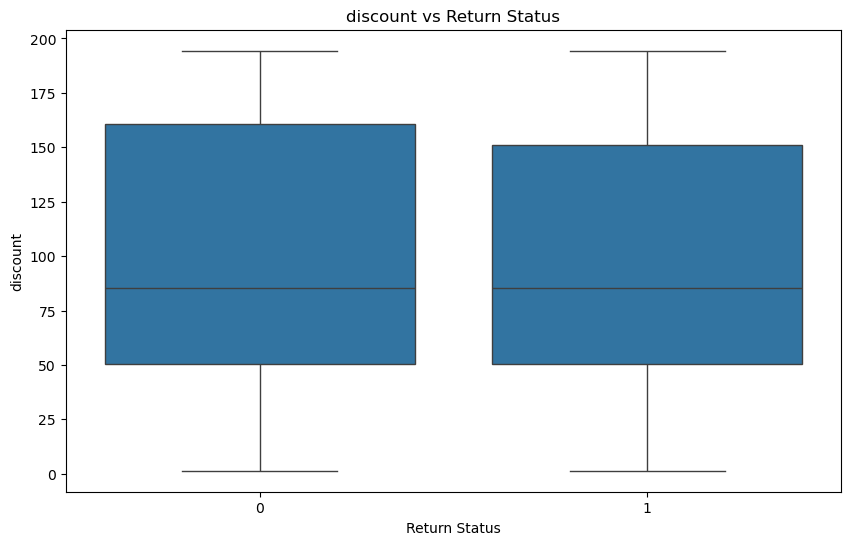

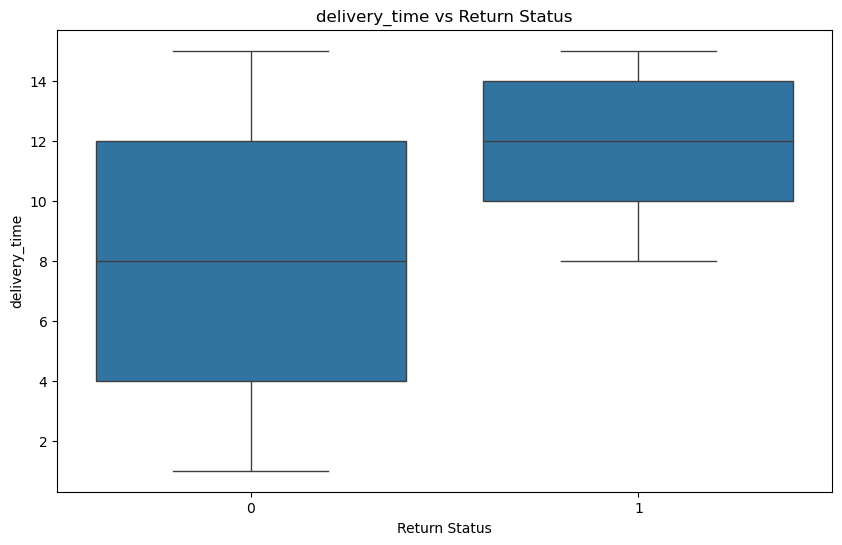

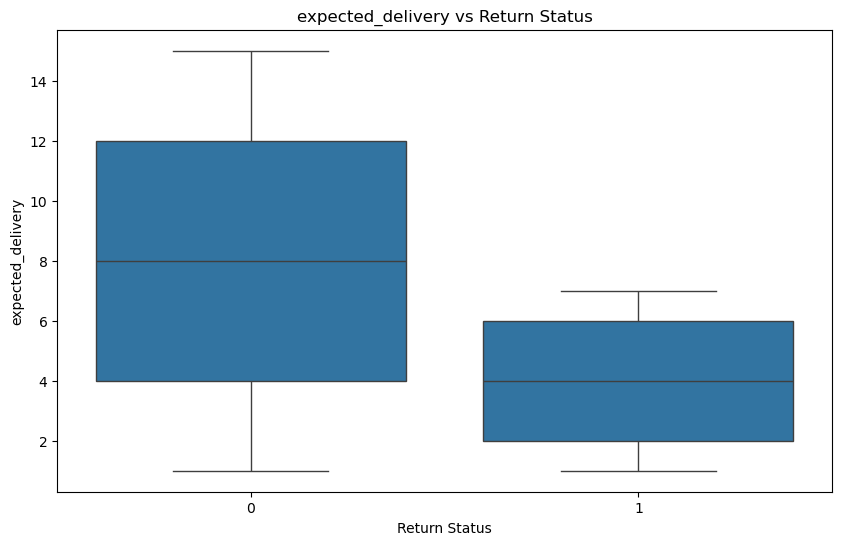

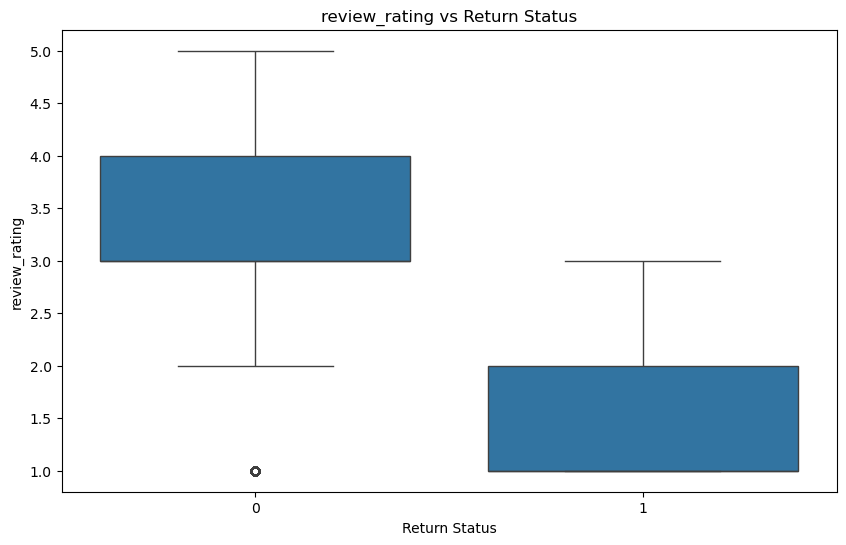

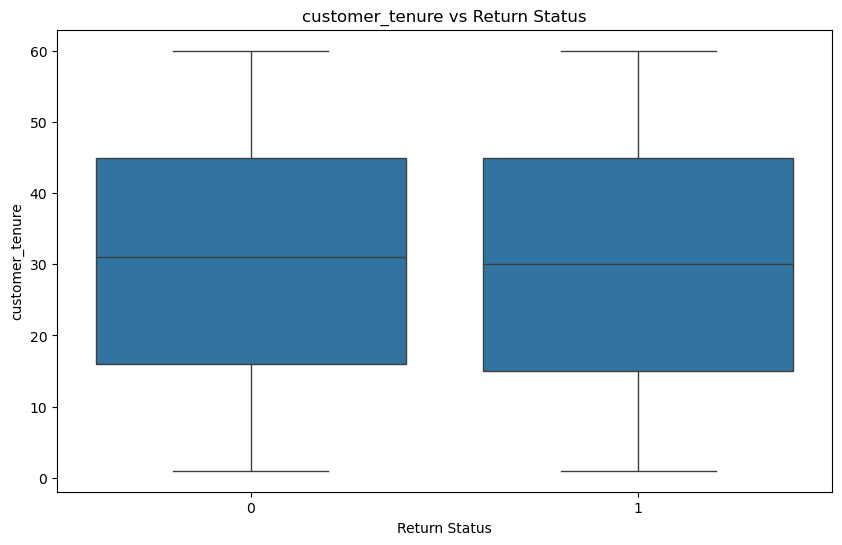

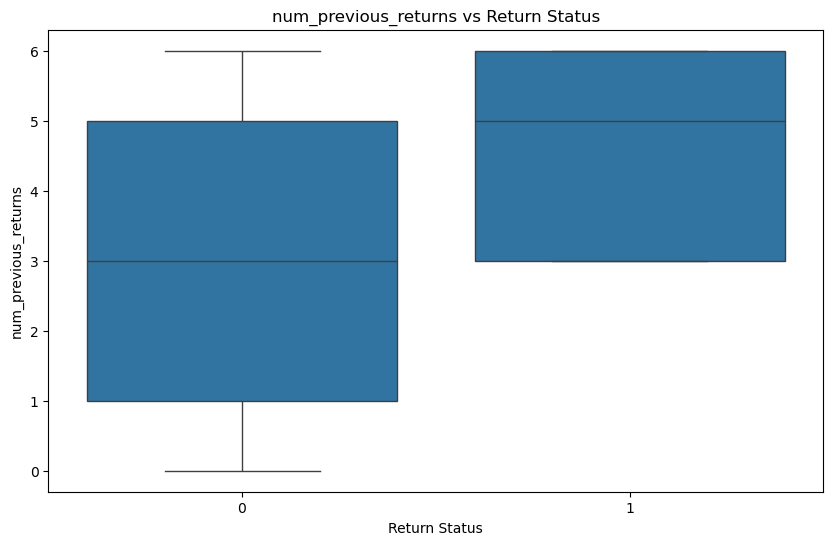

In [33]:
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='return_status', y=col, data=df)
    plt.title(f'{col} vs Return Status')
    plt.xlabel('Return Status')
    plt.ylabel(col)
    plt.show()

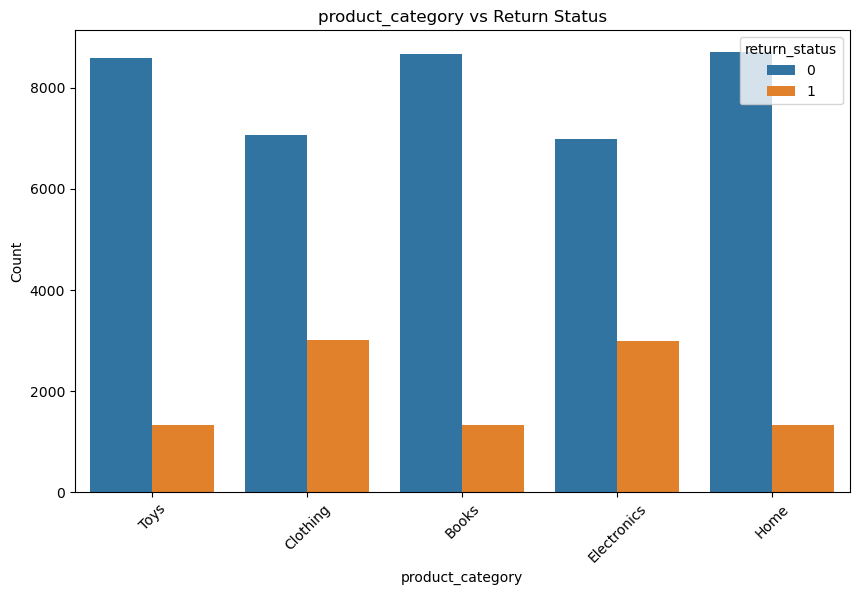

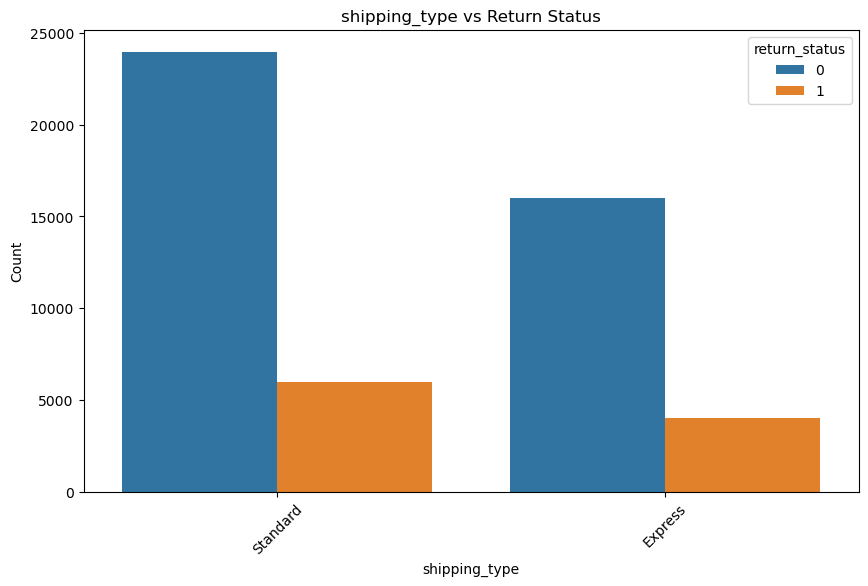

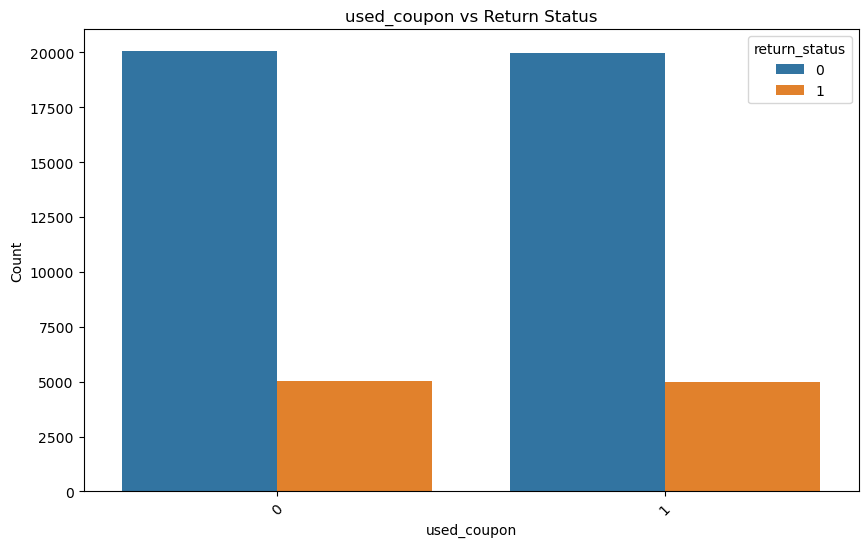

In [39]:
# 3. Categorical Columns
categorical_cols = ['product_category', 'shipping_type', 'used_coupon']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='return_status', data=df)
    plt.title(f'{col} vs Return Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [41]:
# Feature engineering
df['delivery_delay'] = df['delivery_time'] - df['expected_delivery']
df['is_late'] = (df['delivery_delay'] > 0).astype(int)

In [43]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['product_category', 'shipping_type'], drop_first=True)

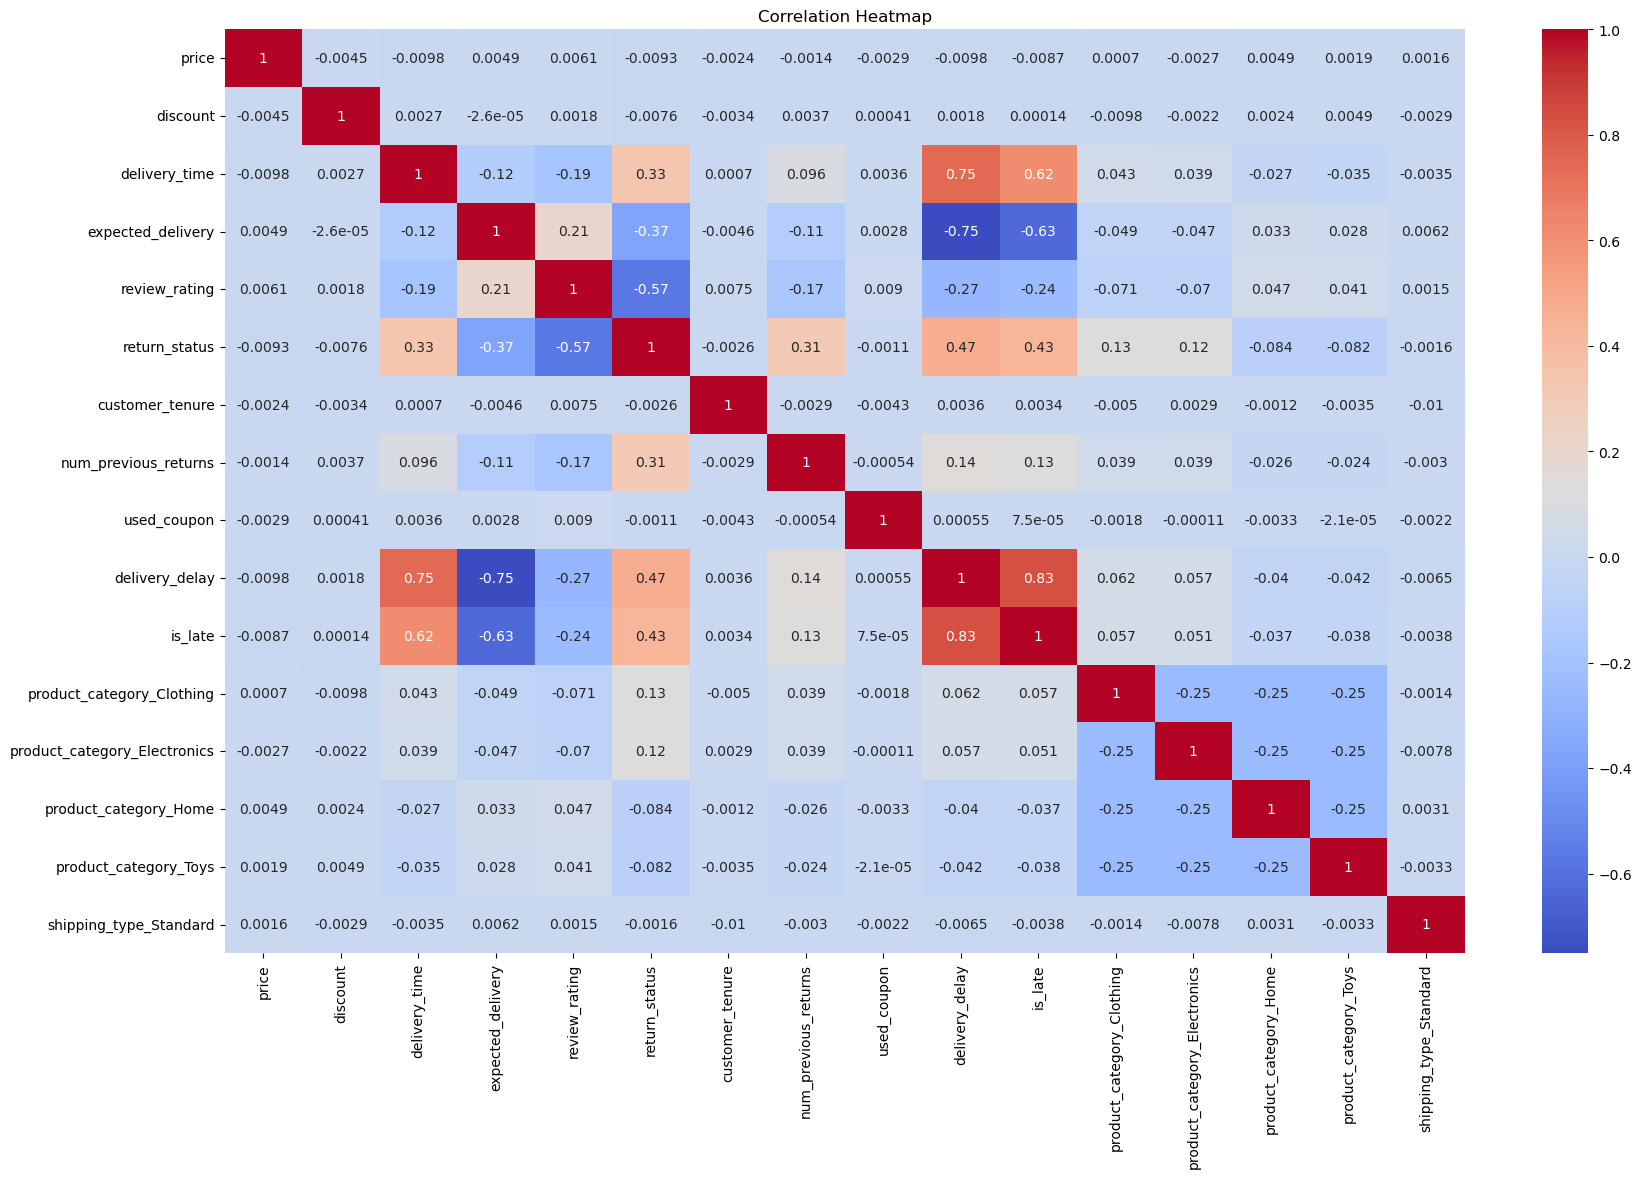

In [45]:
#  Correlation Heatmap
corr_df = df.copy()
plt.figure(figsize=(20, 12))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [47]:
# --- Split Data ---
X = df.drop('return_status', axis=1)
y = df['return_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [49]:
# --- Train Random Forest Model ---
rf_model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, class_weight={0: 1, 1: 2})
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 2}, max_depth=20,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [51]:
# --- Evaluate Models ---
# Random Forest
print("\nRandom Forest Classification Report:")
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print("Random Forest ROC-AUC Score:", roc_auc_rf)


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8000
           1       0.90      0.95      0.92      2000

    accuracy                           0.97     10000
   macro avg       0.94      0.96      0.95     10000
weighted avg       0.97      0.97      0.97     10000

Random Forest ROC-AUC Score: 0.987709375


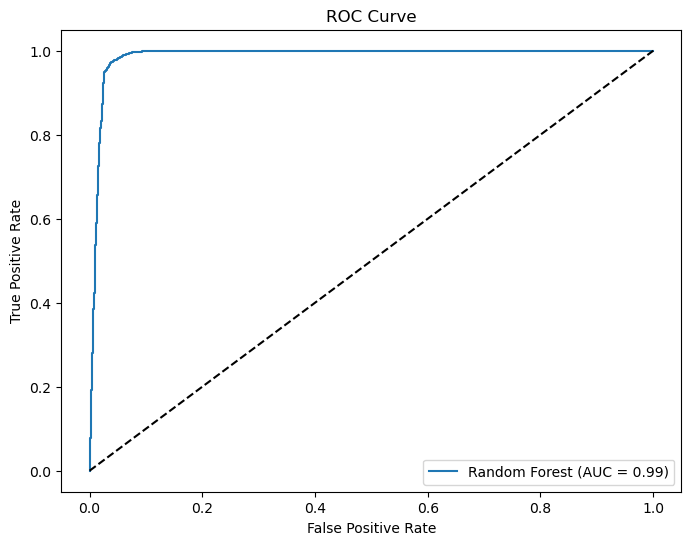

In [53]:
# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

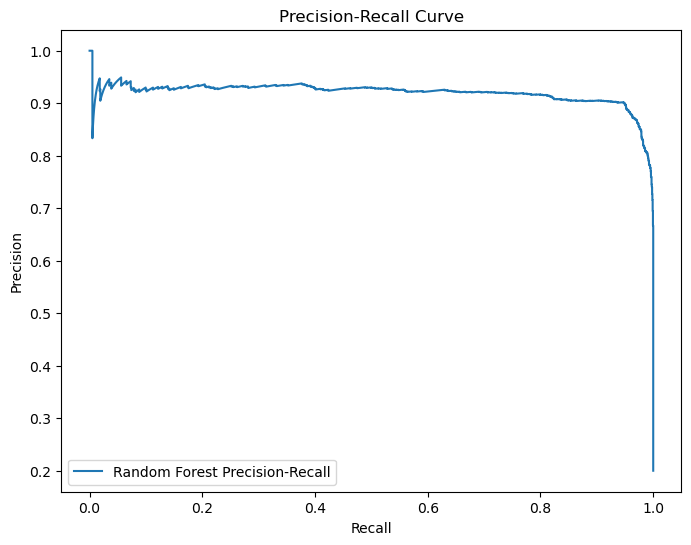

In [55]:
# Precision-Recall Curve
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, label='Random Forest Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

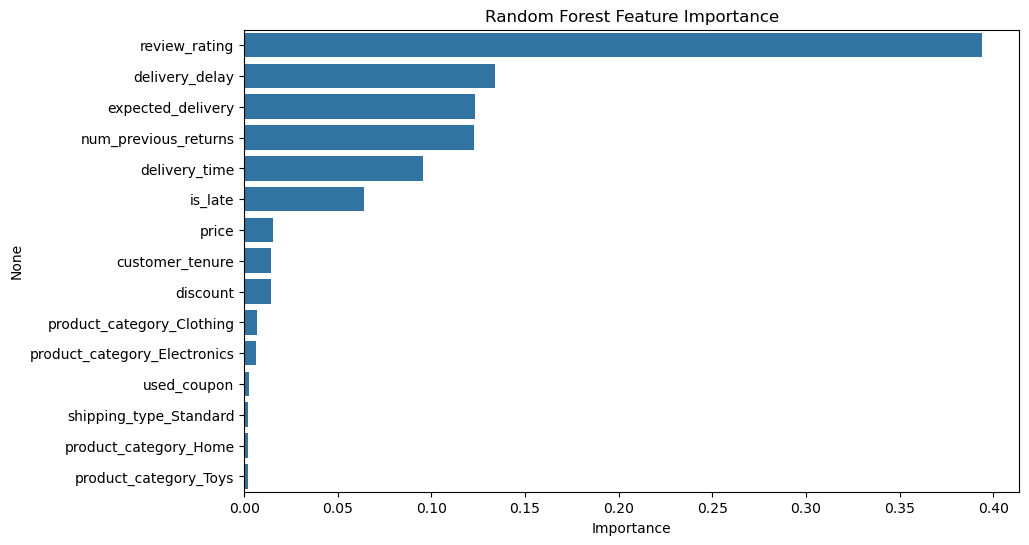


Random Forest Feature Importance:
review_rating                   0.394125
delivery_delay                  0.133945
expected_delivery               0.123439
num_previous_returns            0.122740
delivery_time                   0.095492
is_late                         0.063741
price                           0.015335
customer_tenure                 0.014499
discount                        0.014425
product_category_Clothing       0.007088
product_category_Electronics    0.006254
used_coupon                     0.002502
shipping_type_Standard          0.002321
product_category_Home           0.002105
product_category_Toys           0.001988
dtype: float64


In [57]:
# Feature Importance (Random Forest)
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.show()

print("\nRandom Forest Feature Importance:")
print(feature_importance)

In [59]:
from sklearn.model_selection import cross_val_score
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='f1_macro')
print("Random Forest Cross-Validation F1 Scores:", rf_cv_scores, "Mean:", rf_cv_scores.mean())

Random Forest Cross-Validation F1 Scores: [0.95130356 0.94643786 0.94730462 0.95128609 0.95275363] Mean: 0.9498171504788779
